In [1]:
import sys
sys.path.append('../../build')

In [2]:
import time

In [3]:
import numpy as np
import simpl as MySimplex
from simplicialx.simplicial import SimplicialComplex

In [4]:
games = []

with open("ten_games_bin_matrices.txt", "r") as file:
  games = []
  while True:
    description = file.readline()
    if description == "":
      break
    game = []
    while True:
      move = []
      while True:
        line = file.readline()
        if line == "Next turn\n":
          break
        move.append(list(map(int, line.split())))
      game.append(move)
      next = file.readline()
      if next == "End\n":
        break
    games.append(game)

In [5]:
my_simpl = MySimplex.SimplicialComplex()
other_simpl = SimplicialComplex()

In [6]:
def AddMineSimplex(my_simpl, simplex):
  my_simpl.AddSimplex(simplex)
      
def AddOtherSimplex(other_simpl, simplex):
  other_simpl.add(simplex)
  
def AddMineGame(game_index=0):
  my_simpl = MySimplex.SimplicialComplex()
  
  first_game = games[game_index]
  for move in first_game:
    for figure in move:
      indices = [i for i, x in enumerate(figure) if x == 1]
      if indices != []:
        AddMineSimplex(my_simpl, indices)
  return my_simpl
  
def AddOtherGame(game_index=0):
  other_simpl = SimplicialComplex()
  
  first_game = games[game_index]
  for move in first_game:
    for figure in move:
      indices = [i for i, x in enumerate(figure) if x == 1]
      if indices != []:
        AddOtherSimplex(other_simpl, indices)
  return other_simpl
     

In [7]:
for i, game in enumerate(games):
  print(f"Number of moves in {i}th, game: {len(game)}")

Number of moves in 0th, game: 37
Number of moves in 1th, game: 72
Number of moves in 2th, game: 65
Number of moves in 3th, game: 102
Number of moves in 4th, game: 60
Number of moves in 5th, game: 41
Number of moves in 6th, game: 151
Number of moves in 7th, game: 149
Number of moves in 8th, game: 63
Number of moves in 9th, game: 59


In [8]:
%%time
my_simpl = AddMineGame(0)

CPU times: user 598 ms, sys: 7.66 ms, total: 606 ms
Wall time: 608 ms


In [ ]:
%%time
other_simpl = AddOtherGame(0)

In [ ]:
my_simpl.FVector()

In [ ]:
other_simpl.f_vector

In [ ]:
my_simpl = AddMineGame(0)

In [ ]:
%%time
my_simpl.BettiNumber(1)


In [ ]:
my_simpl = AddMineGame(0)

In [ ]:
%%time
my_simpl.BettiNumber(2)


In [ ]:
my_simpl = AddMineGame(0)

In [ ]:
%%time
my_simpl.BettiNumber(3)

In [ ]:
other_simpl = AddOtherGame(0)

In [ ]:
%%time
other_simpl.betti_number(1)

In [ ]:
other_simpl = AddOtherGame(0)

In [ ]:
%%time
other_simpl.betti_number(2)

In [ ]:
other_simpl = AddOtherGame(0)

In [ ]:
%%time
other_simpl.betti_number(3)

Лаплас

k=1

In [ ]:
my_simpl = AddMineGame(0)

In [ ]:
%%time 
S = my_simpl.LaplacianMatrix(1, 0, 2, False)

In [ ]:
other_simpl = AddOtherGame(0)

In [ ]:
%%time 
other_simpl.laplace_matrix(1).shape

k=2

In [ ]:
my_simpl = AddMineGame(0)

In [ ]:
%%time 
S = my_simpl.LaplacianMatrix(2, 1, 3, False)

In [ ]:
other_simpl = AddOtherGame(0)

In [ ]:
%%time 
other_simpl.laplace_matrix(2).shape

k=3

In [ ]:
my_simpl = AddMineGame(0)

In [ ]:
%%time 
S = my_simpl.LaplacianMatrix(3, 2, 4, False)

In [ ]:
other_simpl = AddOtherGame(0)

In [ ]:
%%time 
other_simpl.laplace_matrix(3).shape

k=3, p=1, q=5

In [ ]:
my_simpl = AddMineGame(0)

In [ ]:
%%time 
S = my_simpl.LaplacianMatrix(3, 1, 5, False)

In [ ]:
other_simpl = AddOtherGame(0)

In [ ]:
%%time 
other_simpl.laplace_matrix(k=3, p=2, q=2).shape

k=5, p=3, q=7

In [ ]:
my_simpl = AddMineGame(0)

In [ ]:
%%time 
S = my_simpl.LaplacianMatrix(5, 3, 7, False)

In [ ]:
other_simpl = AddOtherGame(0)

In [ ]:
%%time 
other_simpl.laplace_matrix(k=5, p=2, q=2).shape

k=11, p=5, q=13

In [ ]:
my_simpl = AddMineGame(0)

In [ ]:
%%time 
S = my_simpl.LaplacianMatrix(11, 5, 13, False)

In [ ]:
len(S)

In [ ]:
other_simpl = AddOtherGame(0)

In [ ]:
%%time 
other_simpl.laplace_matrix(k=11, p=6, q=2).shape

k=11, p=10, q=12

In [ ]:
my_simpl = AddMineGame(0)

In [ ]:
%%time 
S = my_simpl.LaplacianMatrix(11, 10, 12, False)

In [ ]:
len(S)

In [ ]:
other_simpl = AddOtherGame(0)

In [ ]:
%%time 
other_simpl.laplace_matrix(k=11, p=1, q=1).shape

Boundary

k=6, p=5

In [ ]:
my_simpl = AddMineGame(0)

In [ ]:
%%time
tmp = np.array(my_simpl.BoundaryMatrix(6, 5))
tmp.shape

In [ ]:
other_simpl = AddOtherGame(0)

In [ ]:
%%time
tmp = np.array(other_simpl.boundary_operator_matrix(6, 1))
tmp.shape


k=8, p=4

In [ ]:
my_simpl = AddMineGame(0)

In [ ]:
%%time
tmp = np.array(my_simpl.BoundaryMatrix(8, 4))
tmp.shape

In [ ]:
other_simpl = AddOtherGame(0)

In [ ]:
%%time
tmp = np.array(other_simpl.boundary_operator_matrix(8, 4))
tmp.shape


Betweenness


k=1, q=2 (vertices=2d, edge=3d)

In [ ]:
my_simpl = AddMineGame(0)

In [ ]:
%%time
V=my_simpl.BetweennessAll(1, 2, True)

In [ ]:
other_simpl = AddOtherGame(0)

In [ ]:
%%time
V = other_simpl.simplex_betweenness_centrality(p=1, q=2, weighted=True)

k=1, q=2 (vertices=2d, edge=3d), not weighted

In [23]:
my_simpl = AddMineGame(0)

In [24]:
%%time
V=my_simpl.BetweennessAll(1, 2, False)

CPU times: user 2min 5s, sys: 248 ms, total: 2min 5s
Wall time: 13.9 s


In [25]:
other_simpl = AddOtherGame(0)

In [26]:
%%time
V = other_simpl.simplex_betweenness_centrality(p=1, q=2, weighted=False)

CPU times: user 1.87 s, sys: 4.1 ms, total: 1.87 s
Wall time: 1.82 s


Closeness

In [24]:
my_simpl = AddMineGame(0)

In [27]:
%%time
S=my_simpl.ClosenessAll(2, 4, True)

CPU times: user 9.97 s, sys: 26.9 ms, total: 10 s
Wall time: 1.12 s


In [21]:
other_simpl = AddOtherGame(0)

In [23]:
%%time
V = other_simpl.simplex_closeness_centrality(p=2, q=4, weighted=False)

CPU times: user 1min, sys: 121 ms, total: 1min
Wall time: 59.3 s


asdf


In [8]:
def LaplMine(k, p, q, w):
  my_simpl = AddMineGame(0)
  start = time.time()
  my_simpl.LaplacianMatrix(k, p, q, w)
  end = time.time()
  return end - start

In [13]:
def LaplOther(k, p, q, w):
  other_simpl = AddOtherGame(0)
  start = time.time()
  if w == False:
    other_simpl.laplace_matrix(k, p, q)
  else:
    other_simpl.laplace_matrix_weighted(k, p, q)
  end = time.time()
  return end - start

In [10]:
x = np.arange(start=3, stop=14)

In [11]:
y1 = []
y2 = []

In [12]:
for k in x:
  cur_time = LaplMine(k, k - 2, k + 2, False)
  print(k, cur_time)
  y1.append(cur_time)
  

3 11.199959754943848
4 51.17886209487915
5 140.09742784500122
6 224.83758902549744
7 226.03917384147644
8 139.91942405700684
9 61.351808071136475
10 11.332063913345337
11 1.192920207977295
12 0.06865096092224121
13 0.004762172698974609


In [14]:
for k in x:
  cur_time = LaplOther(k, 2, 2, False)
  print(k, cur_time)
  y2.append(cur_time)
  

3 22.11212706565857
4 74.0863950252533
5 141.93740606307983
6 244.08216619491577
7 415.97249364852905
8 230.6967008113861
9 114.43729901313782
10 54.59015679359436
11 34.30890607833862
12 4.283010005950928
13 0.630958080291748


In [15]:
import matplotlib.pyplot as plt


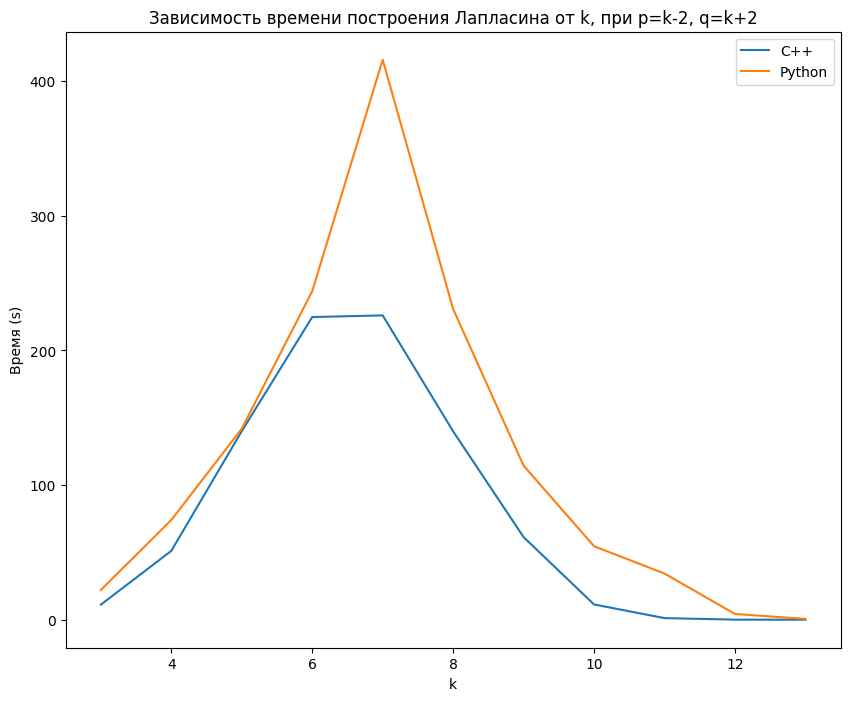

In [16]:
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label ='C++')
plt.plot(x, y2, label ='Python')

plt.xlabel("k")
plt.ylabel("Время (s)")
plt.legend()
plt.title('Зависимость времени построения Лапласина от k, при p=k-2, q=k+2')
plt.show()
